In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [29]:
from scipy.interpolate import InterpolatedUnivariateSpline as IUS 

In [321]:
# !curl https://gitlab.com/SpaceTimeKhantinuum/ml/-/raw/master/nn-fitting/1d-fitting/data_to_fit.txt -O 
!curl https://gitlab.com/SpaceTimeKhantinuum/ml/-/raw/master/nn-fitting/1d-fitting/scaled_data_to_fit.txt -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  499k    0  499k    0     0   909k      0 --:--:-- --:--:-- --:--:--  907k


In [322]:
# !head data_to_fit.txt
!head scaled_data_to_fit.txt

-1.731877611147508267e+00 -8.314675292944490037e-01
-1.731531200984262275e+00 -8.310720418186423597e-01
-1.731184790821016728e+00 -8.306765543428357157e-01
-1.730838380657770736e+00 -8.302810668670290717e-01
-1.730491970494524967e+00 -8.298855793912225387e-01
-1.730145560331278975e+00 -8.294900919154157837e-01
-1.729799150168033428e+00 -8.290946044396092507e-01
-1.729452740004787437e+00 -8.286991169638026067e-01
-1.729106329841541667e+00 -8.283036294879960737e-01
-1.728759919678295898e+00 -8.279081420121893187e-01


In [323]:
def plot_prediction_and_error(x, y, model):
    yhat = model.predict(x)
    yRes = y - yhat
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    axes[0].plot(x, y)
    axes[0].plot(x, yhat)
    axes[1].plot(x, yRes, 'k-o')
    plt.show()
    plt.close()

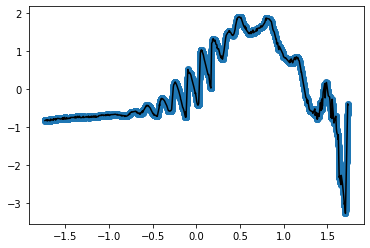

In [324]:
# Xy = np.loadtxt("./data_to_fit.txt")
Xy = np.loadtxt("./scaled_data_to_fit.txt")
# sort by X
X_raw, y_raw = Xy[np.argsort(Xy[:, 0])].T

plt.figure()
plt.scatter(X_raw,y_raw)
plt.plot(X_raw, y_raw, c='k')

In [325]:
def resample_data(X, y, xmin=None, xmax=None, npts=1000, k=1):

    if xmin is None:
        xmin = X[0]
    if xmax is None:
        xmax = X[-1]
    mask = (X>=xmin) & (X<=xmax)

    iy = IUS(X[mask], y[mask], k=k)

    Xnew = np.linspace(xmin, xmax, npts)

    return Xnew, iy(Xnew)

In [329]:
x, y = resample_data(X_raw, y_raw, npts=100)
# x = x[:,np.newaxis] - 0.5
x = x[:,np.newaxis]
y = y[:,np.newaxis]

In [330]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


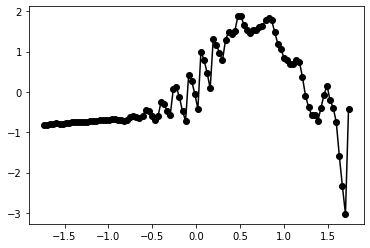

In [332]:
plt.figure()
plt.plot(x, y, 'k-o')
plt.show()
plt.close()

In [333]:
def get_base_model(x, y, verbose=True):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=100, epochs=10000, verbose=verbose)
    
    return history, model

In [334]:
def get_later_model(x, y, verbose=True):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=100, epochs=10000, verbose=verbose)
    
    return history, model

In [335]:
def get_later_model_2(x, y, verbose=True):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=100, epochs=10000, verbose=verbose)
    
    return history, model

In [532]:
def get_later_model_3(x, y, verbose=True, lr=0.1):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    # https://www.tensorflow.org/api_docs/python/tf/keras/experimental/CosineDecayRestarts
#     first_decay_steps = 20
#     lr_decayed_fn = (
#       tf.keras.experimental.CosineDecayRestarts(
#           lr,
#           first_decay_steps,
#           t_mul=2.,
#           m_mul=1
#       ))

#     lr_scheuler = tf.keras.callbacks.LearningRateScheduler(lr_decayed_fn)
    
    optimizer = tf.keras.optimizers.Adam(lr)
    model.compile(loss='mse', optimizer=optimizer)
    
#     history = model.fit(x, y, batch_size=100, epochs=10000, verbose=verbose, callbacks=[lr_scheuler])
    history = model.fit(x, y, batch_size=100, epochs=10000, verbose=verbose)
    
    return history, model

In [336]:
%%time
history, model = get_base_model(x, y, verbose=False)

CPU times: user 20.5 s, sys: 3.26 s, total: 23.7 s
Wall time: 10.7 s


In [337]:
# tf.keras.utils.plot_model(model, show_shapes=True)

In [338]:
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 200)               400       
_________________________________________________________________
dense_149 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_150 (Dense)            (None, 1)                 201       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________________________


In [339]:
yhat = model.predict(x)

In [340]:
yRes = y-yhat

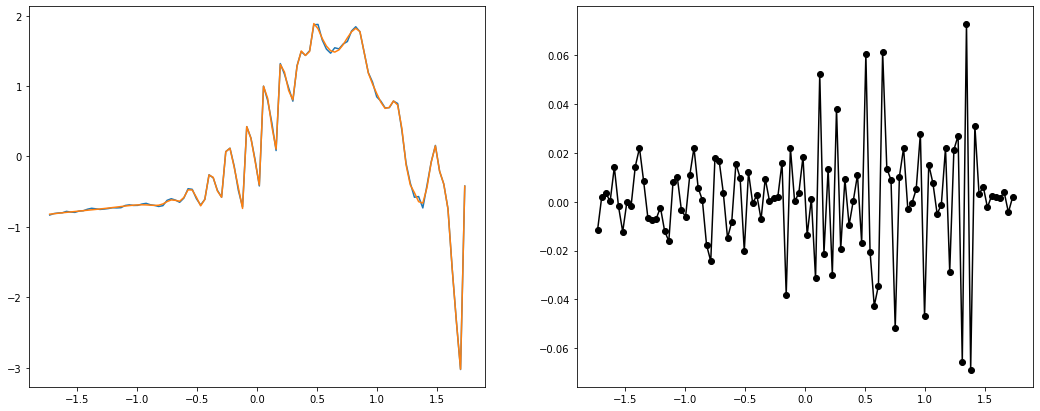

In [342]:
plot_prediction_and_error(x, y, model)

In [366]:
%%time
history2, model2 = get_later_model(x, yRes, False)

CPU times: user 18.8 s, sys: 2.97 s, total: 21.7 s
Wall time: 9.48 s


In [367]:
yhat2 = model2.predict(x)

In [368]:
yRes2 = yRes-yhat2

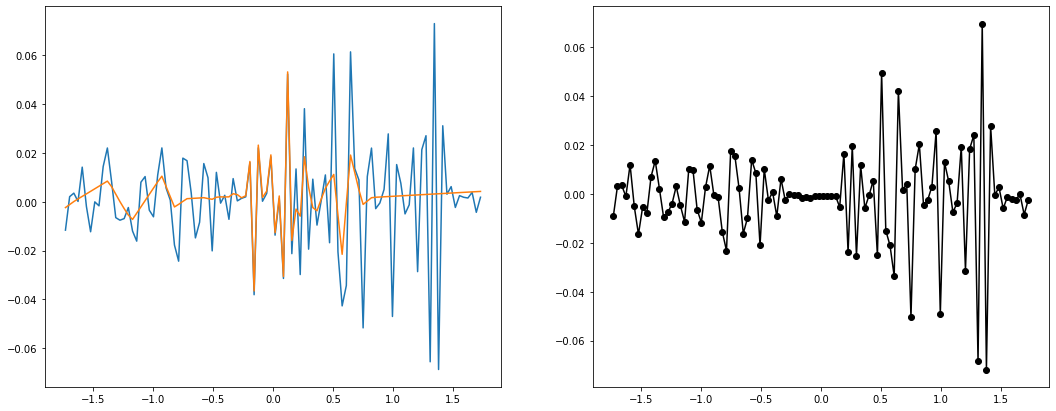

In [369]:
plot_prediction_and_error(x, yRes, model2)

In [370]:
model2.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_166 (Dense)            (None, 200)               400       
_________________________________________________________________
dense_167 (Dense)            (None, 200)               40200     
_________________________________________________________________
dense_168 (Dense)            (None, 1)                 201       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________________________


In [383]:
%%time
history3, model3 = get_later_model(x, yRes2, False)

CPU times: user 18.5 s, sys: 3.01 s, total: 21.5 s
Wall time: 9.33 s


In [384]:
yhat3 = model3.predict(x)

In [385]:
yRes3 = yRes2-yhat3

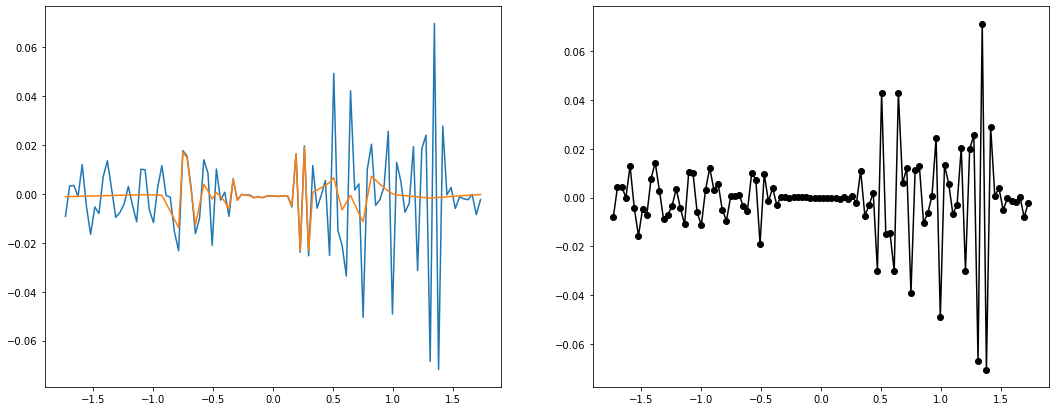

In [386]:
plot_prediction_and_error(x, yRes2, model3)

In [391]:
%%time
# here we see that the difference between model3 and model4 is basically zero
# so this is a hint that we should make the next network block more complicated
history4, model4 = get_later_model(x, yRes3, False)

CPU times: user 20.2 s, sys: 3.17 s, total: 23.3 s
Wall time: 10.5 s


In [392]:
yhat4 = model4.predict(x)

In [393]:
yRes4 = yRes3-yhat4

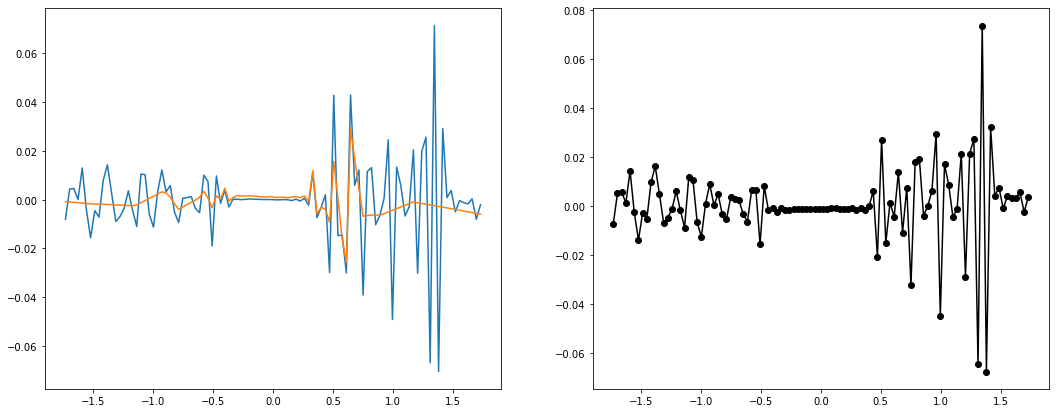

In [394]:
plot_prediction_and_error(x, yRes3, model4)

In [395]:
%%time
history5, model5 = get_later_model_2(x, yRes4, False)

CPU times: user 36.2 s, sys: 6.32 s, total: 42.5 s
Wall time: 15 s


In [396]:
yhat5 = model5.predict(x)

In [397]:
yRes5 = yRes4-yhat5

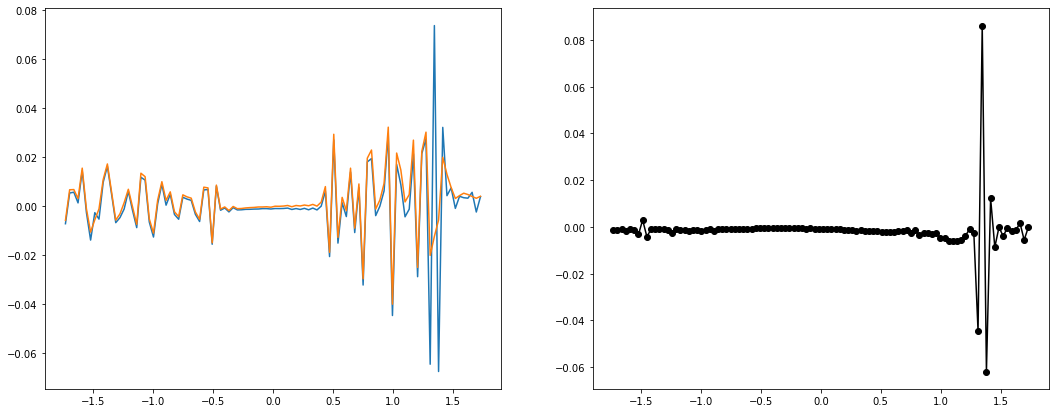

In [398]:
plot_prediction_and_error(x, yRes4, model5)

In [413]:
%%time
# scale so inpute are nicer for the ANN
history6, model6 = get_later_model_2(x, yRes5, False)

CPU times: user 35.9 s, sys: 6.38 s, total: 42.3 s
Wall time: 14.6 s


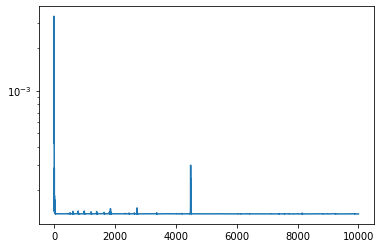

In [414]:
h6 = history6.history['loss']
plt.figure()
plt.plot(range(len(h6)), h6)
plt.yscale('log')

In [415]:
yhat6 = model6.predict(x)

In [416]:
yRes6 = yRes5-yhat6

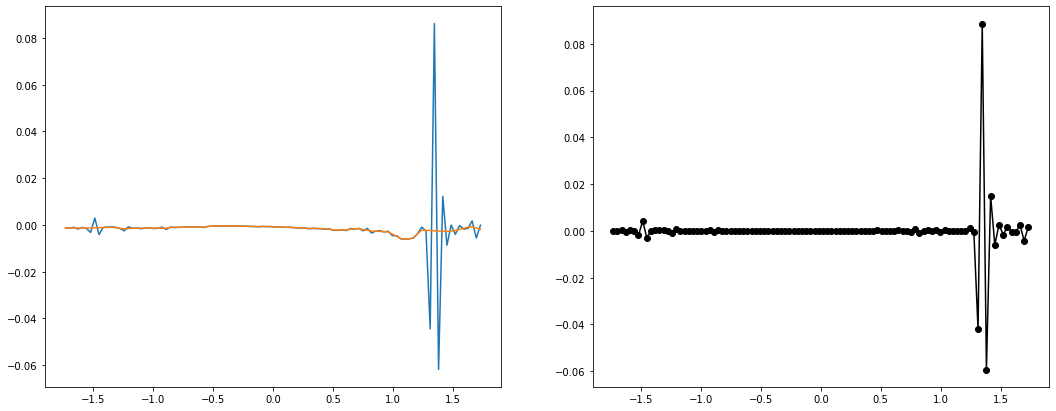

In [417]:
plot_prediction_and_error(x, yRes5, model6)

In [533]:
%%time
# scale so inpute are nicer for the ANN
# history7, model7 = get_later_model_2(x, yRes6, False)
history7, model7 = get_later_model_3(x, yRes6, False, lr=0.1)

CPU times: user 59.1 s, sys: 4.88 s, total: 1min 3s
Wall time: 16.7 s


In [525]:
# cosine learning rate would be useful

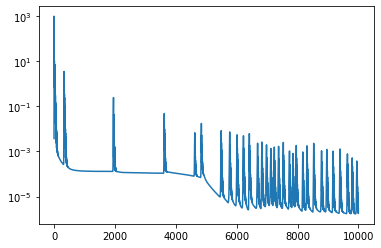

In [534]:
h7 = history7.history['loss']
plt.figure()
plt.plot(range(len(h7)), h7)
plt.yscale('log')

In [535]:
# h7_lr = history7.history['lr']
# plt.figure()
# plt.plot(range(len(h7_lr)), h7_lr)
# plt.yscale('log')

In [536]:
yhat7 = model7.predict(x)

In [537]:
yRes7 = yRes6-yhat7

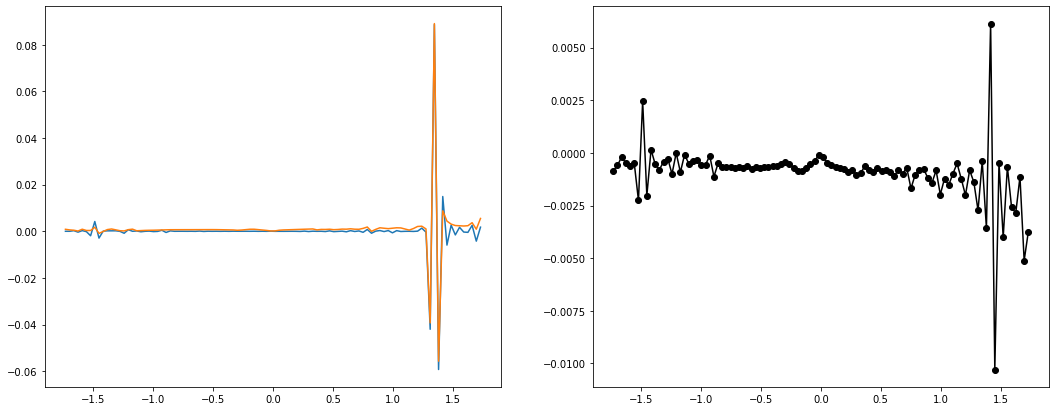

In [538]:
plot_prediction_and_error(x, yRes6, model7)

In [550]:
%%time
# scale so inpute are nicer for the ANN
# history8, model8 = get_later_model_2(x, yRes7, False)
history8, model8 = get_later_model_3(x, yRes7, False, lr=0.1)

CPU times: user 59.8 s, sys: 5.21 s, total: 1min 5s
Wall time: 17.7 s


In [525]:
# cosine learning rate would be useful

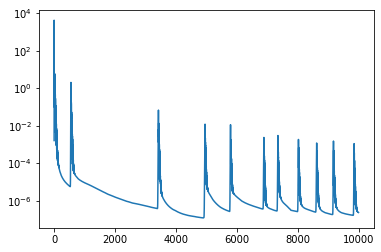

In [551]:
h8 = history8.history['loss']
plt.figure()
plt.plot(range(len(h8)), h8)
plt.yscale('log')

In [552]:
yhat8 = model8.predict(x)

In [553]:
yRes8 = yRes7-yhat8

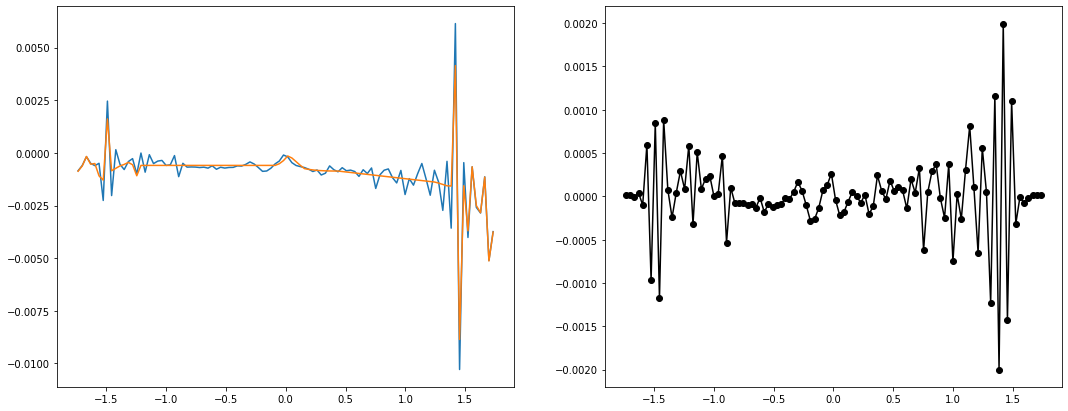

In [554]:
plot_prediction_and_error(x, yRes7, model8)

In [442]:
# each level / network block basically acts to fit/model a type of feature which
# we then subtract so we can model the next feature

# add them all together

In [555]:
y_parts = [model.predict(x), model2.predict(x), model3.predict(x), model4.predict(x), model5.predict(x), model6.predict(x), model7.predict(x), model8.predict(x)]

In [556]:
y_final_parts = [y_parts[0]]
for i in range(1, len(y_parts)):
    y_final_parts.append(y_final_parts[i-1] + y_parts[i])
    
    
# y_final_parts[0] = model.predict(x)
# y_final_parts[0] = y_final_parts[0] + model2.predict(x) 
    

In [557]:
y_final = np.sum(y_parts, axis=0)

In [558]:
# y_final = model.predict(x) + model2.predict(x) + model3.predict(x) + model4.predict(x) + model5.predict(x) + model6.predict(x)/1000 + model7.predict(x)

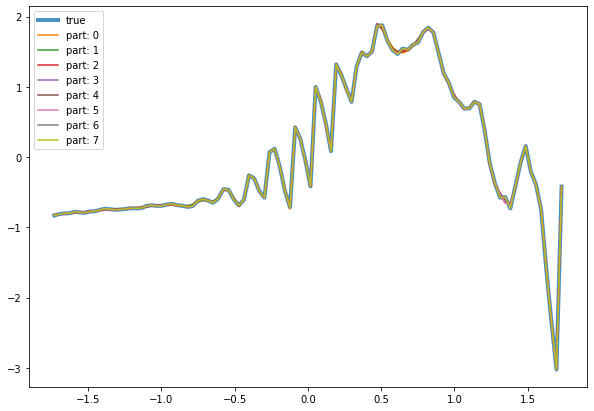

In [559]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, label='true', lw=4, alpha=0.8)
for i, yp in enumerate(y_final_parts):
    plt.plot(x, yp, label=f'part: {i}')
plt.legend()

(-0.5, 0.5)

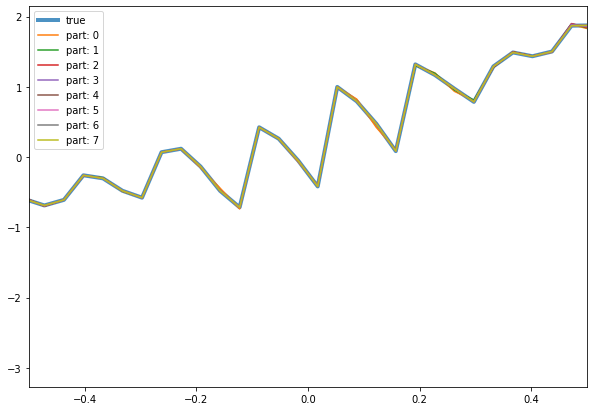

In [560]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, label='true', lw=4, alpha=0.8)
for i, yp in enumerate(y_final_parts):
    plt.plot(x, yp, label=f'part: {i}')
plt.legend()
plt.xlim(-0.5, 0.5)

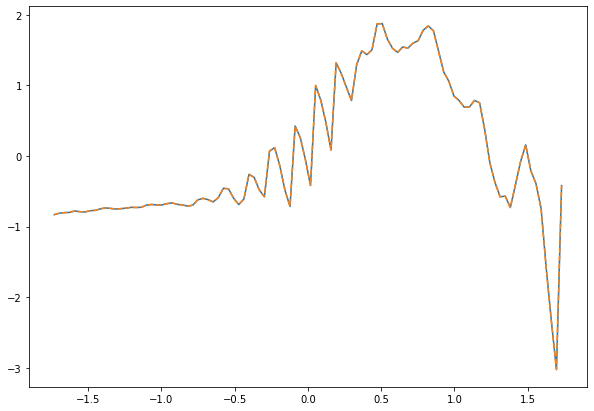

In [561]:
plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.plot(x, y_final, ls='--')

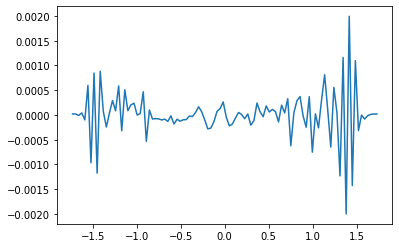

In [562]:
plt.figure()
plt.plot(x, y-y_final)

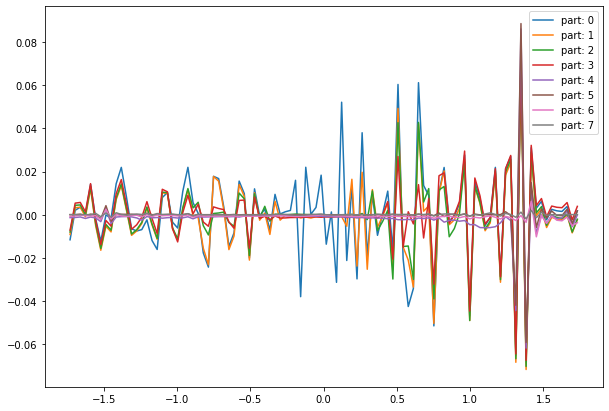

In [563]:
plt.figure(figsize=(10, 7))
for i, yp in enumerate(y_final_parts):
    plt.plot(x, y-yp, label=f'part: {i}')
plt.legend()

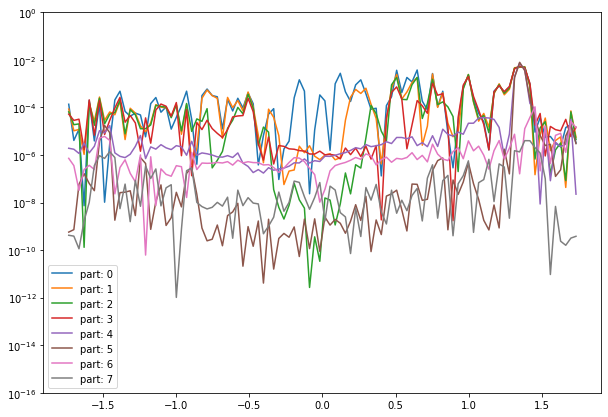

In [564]:
plt.figure(figsize=(10, 7))
for i, yp in enumerate(y_final_parts):
    plt.plot(x, tf.keras.losses.mean_squared_error(y, yp), label=f'part: {i}')
plt.yscale('log')
plt.ylim(1e-16, 1)
plt.legend()

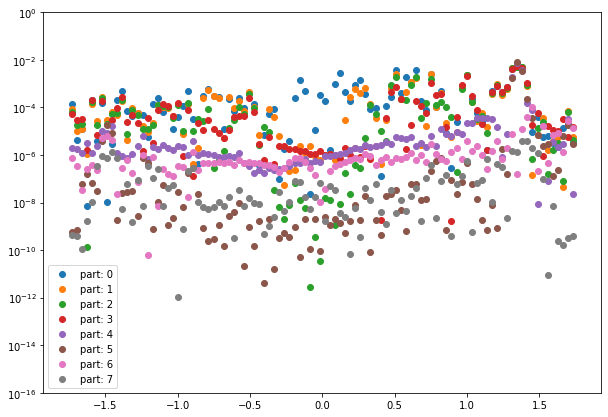

In [565]:
plt.figure(figsize=(10, 7))
for i, yp in enumerate(y_final_parts):
    plt.scatter(x, tf.keras.losses.mean_squared_error(y, yp), label=f'part: {i}')
plt.yscale('log')
plt.ylim(1e-16, 1)
plt.legend()